0.0005678286537971031


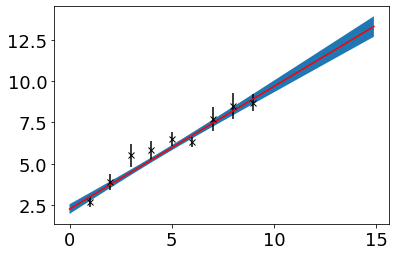

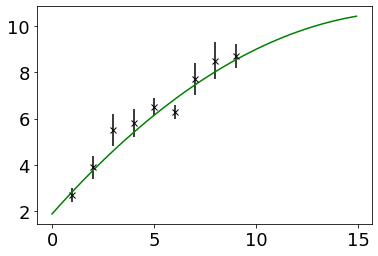

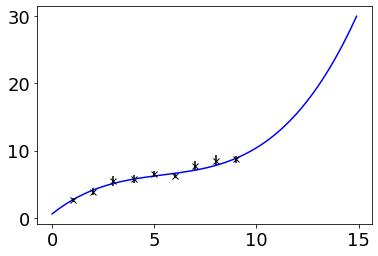

In [39]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt

## Input data arrays
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y = np.array([2.7, 3.9, 5.5, 5.8, 6.5, 6.3, 7.7, 8.5, 8.7])
sig = np.array([0.3, 0.5, 0.7, 0.6, 0.4, 0.3, 0.7, 0.8, 0.5])

## Polynomial function
def polynomial(x, *theta): return sum([theta[i]*x**i for i in range(len(theta))])
    
## First order
p0_first = np.array([1.0, 1.0])
theta_hat_first, covariance_first = curve_fit(polynomial, x, y, p0_first, sig, absolute_sigma=True)

## Second order
p0_second = np.array([1.0, 1.0, 1.0])
theta_hat_second, covariance_second =  curve_fit(polynomial, x, y, p0_second, sig, absolute_sigma=True)

## Third order
p0_third = np.array([1.0, 1.0, 1.0, 1.0])
theta_hat_third, covariance_third =  curve_fit(polynomial, x, y, p0_third, sig, absolute_sigma=True)

## Fitting

fit_first = np.vectorize(lambda x : theta_hat_first[0] + theta_hat_first[1]*x)
fit_second = np.vectorize(lambda x : theta_hat_second[0] + theta_hat_second[1]*x + theta_hat_second[2]*x**2)
fit_third = np.vectorize(lambda x : theta_hat_third[0] + theta_hat_third[1]*x + theta_hat_third[2]*x**2 + theta_hat_third[3]*x**3)

## Standard Deviation


std_dev_first = np.vectorize(lambda x : covariance_first[0][0] + 2*x*covariance_first[1][0] + x**2*covariance_first[1][1])

#std_dev_second = np.vectorize(lambda x : covariance_second[0][0][0] + 3*x*covariance_second[1][0][1] + 3*x*covariance_second[1][1][0] + x**3*covariance_second[1][1][1])

print(covariance_second[2][2])

## Create plots
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()


x_val = np.arange(0, 15, 0.1)

## Plot given data with sigma
ax1.errorbar(x, y, yerr=sig, fmt='kx')
ax2.errorbar(x, y, yerr=sig, fmt='kx')
ax3.errorbar(x, y, yerr=sig, fmt='kx')

## Plot the three fits
ax1.plot(x_val, fit_first(x_val), 'r', label="first order")
ax1.fill_between(x_val, fit_first(x_val)-np.sqrt(std_dev_first(x_val)), fit_first(x_val)+np.sqrt(std_dev_first(x_val)))

ax2.plot(x_val, fit_second(x_val), 'g', label="second order")
#ax2.fill_between(x_val, fit_second(x_val)-np.sqrt(std_dev_second(x_val)), fit_second(x_val)+np.sqrt(std_dev_second(x_val)))

ax3.plot(x_val, fit_third(x_val), 'b', label="third order")

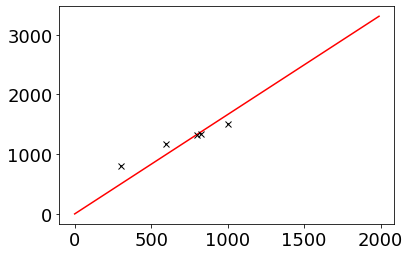

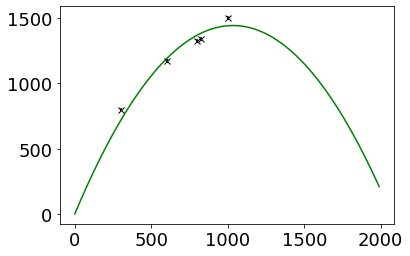

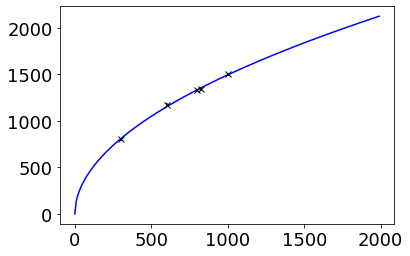

In [55]:
h = np.array([300, 600, 800, 828, 1000])
d = np.array([800, 1172, 1328, 1340, 1500])
sig = np.array([15, 15, 15, 15, 15])

## Hypotheses

def f1(h, *vars):
    a, = vars
    return a*h

def f2(h, *vars):
    a, b = vars
    return a*h + b*h**2

def f3(h, *vars):
    a, b = vars
    return a*h**b

## Least squares

p0_one = np.array([1.0])
theta_hat_one, covariance_one = curve_fit(f1, h, d, p0_one, sig, absolute_sigma=True)

p0_two = np.array([1.0, 1.0])
theta_hat_two, covariance_two = curve_fit(f2, h, d, p0_two, sig, absolute_sigma=True)

p0_three = np.array([1.0, 1.0])
theta_hat_three, covariance_three = curve_fit(f3, h, d, p0_three, sig, absolute_sigma=True)

## Curve fitting

fit_one = np.vectorize(lambda h : theta_hat_one[0]*h)
fit_two = np.vectorize(lambda h : theta_hat_two[0]*h + theta_hat_two[1]*h**2)
fit_three = np.vectorize(lambda h : theta_hat_three[0]*h**theta_hat_three[1])

## Plotting

## Create plots
fig4 = plt.figure()
fig5 = plt.figure()
fig6 = plt.figure()
ax4 = fig4.add_subplot()
ax5 = fig5.add_subplot()
ax6 = fig6.add_subplot()

h_val = np.arange(0, 2000, 10)

## Plot given data with sigma
ax4.errorbar(h, d, yerr=15, fmt='kx')
ax4.plot(h_val, fit_one(h_val), 'r', label="first hypothesis")

ax5.errorbar(h, d, yerr=15, fmt='kx')
ax5.plot(h_val, fit_two(h_val), 'g', label="second hypothesis")

ax6.errorbar(h, d, yerr=15, fmt='kx')
ax6.plot(h_val, fit_three(h_val), 'b', label="second hypothesis")

